**<div align="center"> M22AI660 VIGNESH PITCHAIAH </div>**



In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import keras
from keras.models import Sequential
from tensorflow.keras.applications import VGG16
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

#  Visualizing the data 


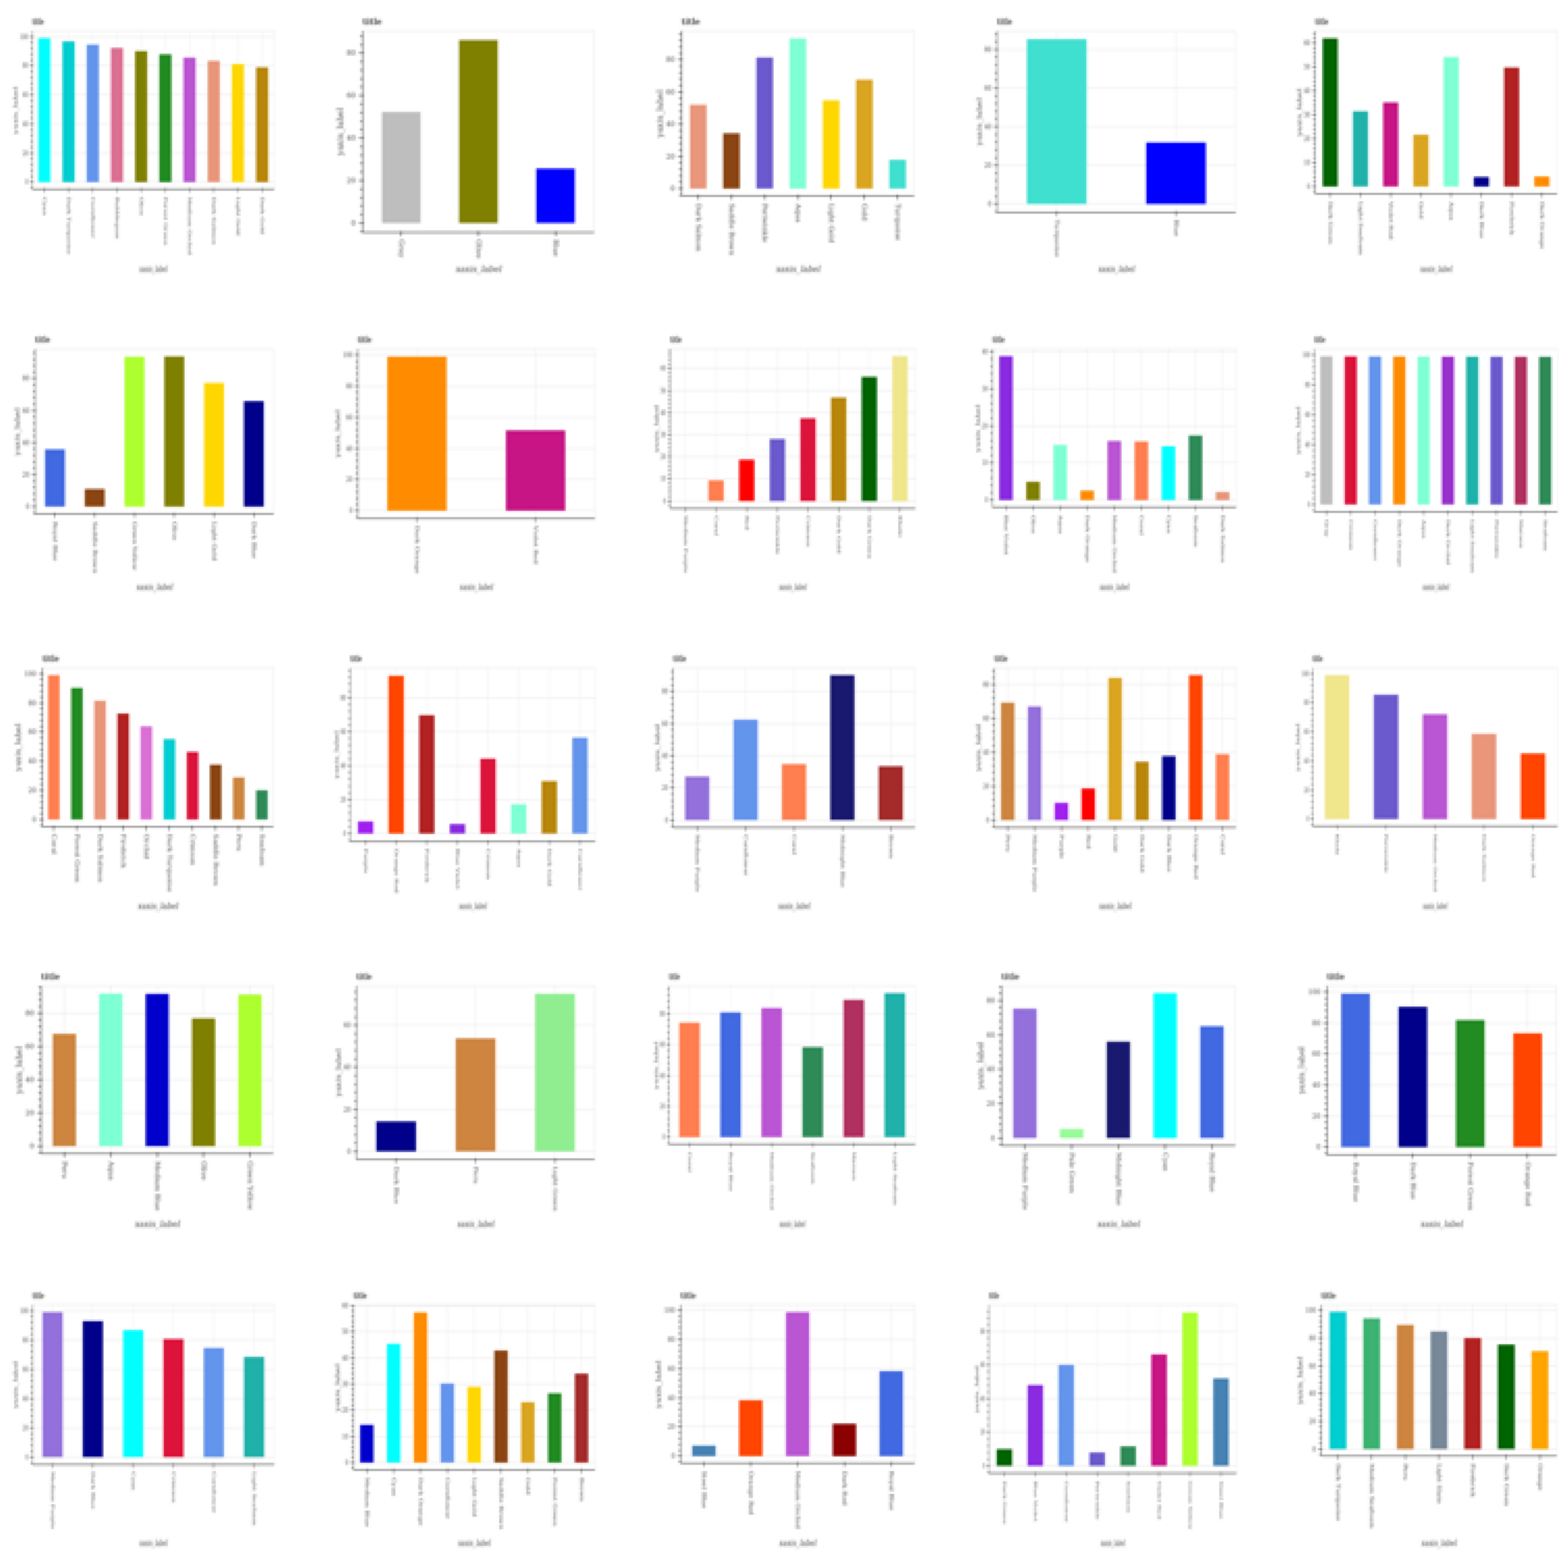

In [2]:
folder_path = './data/train_val'

# create a list of image file names in the folder
file_names = os.listdir(folder_path)

# create a grid of images
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
for i in range(5):
    for j in range(5):
        img = Image.open(os.path.join(folder_path, file_names[i*5 + j]))
        axs[i, j].imshow(img)
        axs[i, j].axis('off')

plt.show()

In [3]:
import pandas as pd

# reading the CSV file
df = pd.read_csv('./data/train_val.csv')

# dataframe
df.head()

,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical


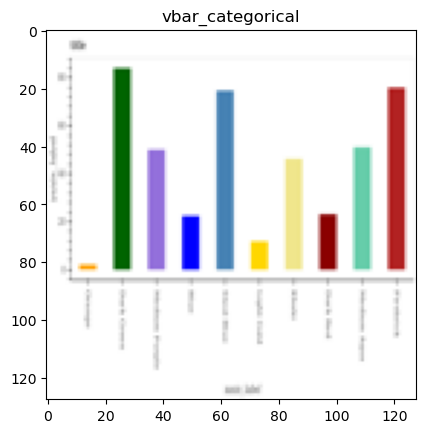

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Here  we're Loading the CSV file into a pandas dataframe
df = pd.read_csv('./data/train_val.csv')

# Here  we're Setting the index column to be the image index column
df.set_index('image_index', inplace=True)

# Here  we're Creating a function to retrieve the image and label given an image index
def get_image_and_label(image_index):
    # Here  we're Getting the filename for the given image index
    filename = str(image_index) + '.png'
    
    # Here  we're Loading the image using PIL
    img = Image.open('./data/train_val/' + filename)
    
    # Here  we're Getting the label for the given image index
    label = df.loc[image_index, 'type']
    
    return img, label

# Here  we're Calling the function to get the image and label for a specific image index
img, label = get_image_and_label(6)

# Displaying the image and label
plt.imshow(img)
plt.title(label)
plt.show()

# 

# CNN Algorithm and Data Preprocessing

In [5]:
class DataProcessor:
    def __init__(self, data_path):
        """
            Initializes the DataProcessor object with a path to the data and a label map.
        """
        self.data_path = data_path
        self.label_map = {'line': 0, 'dot_line': 1, 'vbar_categorical': 2, 'hbar_categorical': 3, 'pie': 4}
        
    def load_data(self):
        """
            Reads in the data from the given path and preprocesses it by resizing the images and 
            normalizing the pixel values. Returns the preprocessed data and its corresponding labels.
        """
        train = pd.read_csv(self.data_path)
        train_image = []
        for i in tqdm(range(train.shape[0])):
            img = Image.open(f"./data/train_val/{train['image_index'][i]}.png").convert('RGB').resize((128, 128))
            img = np.array(img)
            img = img/255
            train_image.append(img)
        X = np.array(train_image)
        y = train['type'].map(self.label_map).values
        y = to_categorical(y)
        return X, y

class ModelTrainer:
    def __init__(self, X_train, y_train, X_test, y_test):
        """
            Initializes the ModelTrainer object with the training and testing data.
        """
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        
    def build_model(self):
        """
            Builds a convolutional neural network model and compiles it with the Adam optimizer 
            and categorical cross-entropy loss function. Returns the compiled model.
        """
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(128, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(GlobalAveragePooling2D())
        model.add(Dense(5, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
        return model
    
    def train_model(self, model, epochs=7):
        """
            Trains the given model with the specified number of epochs and the training and testing data.
            Returns the training history.
        """
        history = model.fit(self.X_train, self.y_train, epochs=epochs, validation_data=(self.X_test, self.y_test))
        return history
    
    def evaluate_model(self, model):
        """
            Evaluates the given model on the testing data and prints the accuracy.
        """
        _, accuracy = model.evaluate(self.X_test, self.y_test)
        print('Accuracy: %.2f' % (accuracy*100))
    
    def plot_loss(self, history):
        """
            Plots the training and validation loss from the given training history.
        """
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(train_loss)+1)
        plt.plot(epochs, train_loss, 'bo', label='Training Loss')
        plt.plot(epochs, val_loss, 'b', label='Validation Loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
    def plot_accuracy(self, history):
        """
            Plots the training and validation accuracy from the given training history.
        """
        train_acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        epochs = range(1, len(train_acc)+1)
        plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
        plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()


# 

# TRAINING AND EVALUATION

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 616.17it/s]


Epoch 1/7
25/25 [==============================] - 90s 4s/step - loss: 1.5799 - accuracy: 0.2587 - val_loss: 1.4957 - val_accuracy: 0.3500
Epoch 2/7
25/25 [==============================] - 95s 4s/step - loss: 1.2513 - accuracy: 0.4563 - val_loss: 1.0645 - val_accuracy: 0.4700
Epoch 3/7
25/25 [==============================] - 98s 4s/step - loss: 0.8913 - accuracy: 0.5663 - val_loss: 0.7386 - val_accuracy: 0.7700
Epoch 4/7
25/25 [==============================] - 103s 4s/step - loss: 0.7812 - accuracy: 0.6212 - val_loss: 0.6569 - val_accuracy: 0.7650
Epoch 5/7
25/25 [==============================] - 99s 4s/step - loss: 0.6869 - accuracy: 0.6950 - val_loss: 0.5757 - val_accuracy: 0.7550
Epoch 6/7
25/25 [==============================] - 106s 4s/step - loss: 0.5763 - accuracy: 0.7625 - val_loss: 0.4967 - val_accuracy: 0.7950
Epoch 7/7
7/7 [==============================] - 7s 956ms/step - loss: 0.4125 - accuracy: 0.8500
Accuracy: 85.00


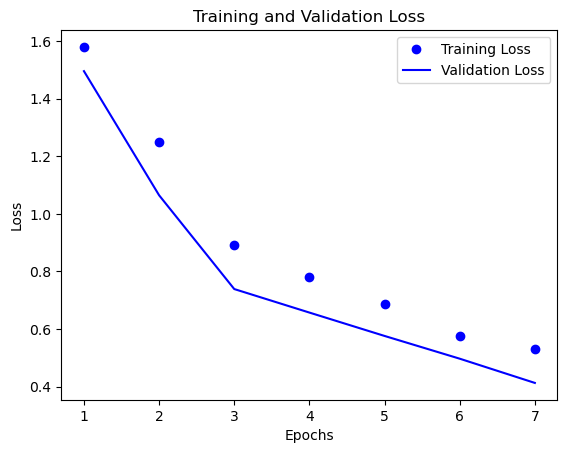

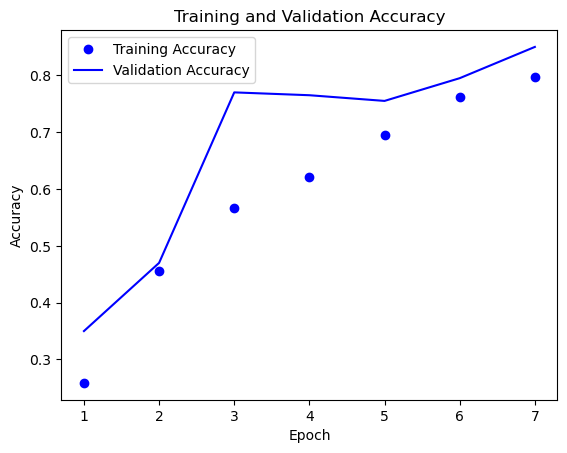

In [6]:
"""
Create an instance of DataProcessor class by passing path of the CSV file containing data
"""
data_processor = DataProcessor('./data/train_val.csv')

"""
Load data from the CSV file using the load_data() method of DataProcessor class
Returns X and y arrays
"""
X, y = data_processor.load_data()

"""
Split the data into train and test sets using train_test_split() function
Random state is set to 42 and test size is 0.2
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

"""
Create an instance of ModelTrainer class by passing train and test sets
"""
model_trainer = ModelTrainer(X_train, y_train, X_test, y_test)

"""
Build the CNN model using build_model() method of ModelTrainer class
"""
model = model_trainer.build_model()

"""
Train the model using train_model() method of ModelTrainer class
Returns the training history
"""
history = model_trainer.train_model(model)

"""
Evaluate the model on the test set using evaluate_model() method of ModelTrainer class
Prints the accuracy of the model on the test set
"""
model_trainer.evaluate_model(model)

"""
Plot the training and validation loss and accuracy using plot_accuracy() & plot_loss() method of ModelTrainer class
"""
model_trainer.plot_loss(history)

model_trainer.plot_accuracy(history)


## EVALUATION

 * Confusion Matrix
 * F1 score
 * Precision score
 * Recall score
 * SME

In [7]:
# Make predictions using the trained model on the test set
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_true, y_pred_classes)

7/7 [==============================] - 7s 974ms/step


In [8]:
# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Calculate precision score
precision = precision_score(y_true, y_pred_classes, average='weighted')

# Calculate recall score
recall = recall_score(y_true, y_pred_classes, average='weighted')

# Calculate SME (Symmetric Mean Absolute Error)
sme = np.sum(np.abs(y_true - y_pred_classes)) / (2 * len(y_true))

In [9]:
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[35  2  0  0  0]
 [12 32  0  0  0]
 [ 0  0 25  0  8]
 [ 0  1  1 42  4]
 [ 0  0  2  0 36]]


In [10]:
print("F1 score:", f1)

F1 score: 0.8507101838491373


In [11]:
print("Precision score:", precision)

Precision score: 0.8687302431610943


In [12]:
print("Recall score:", recall)

Recall score: 0.85


In [13]:
print("SME:", sme)

SME: 0.1025



#  Testing with unseen data

In [14]:
# Defining the path to the new image folder
new_images_folder = './data/test'

# Loading the new images from the folder into a list
new_images = []
for filename in os.listdir(new_images_folder):
    img = Image.open(os.path.join(new_images_folder, filename)).convert('RGB').resize((128, 128))
    img = np.array(img)
    img = img/255
    new_images.append(img)
    
# Converting the list of images into a numpy array
new_images = np.array(new_images)

# Making predictions on the new images using the trained model
predicted_probabilities = model.predict(new_images)

# Getting the predicted class labels by taking the index of the maximum predicted probability for each image
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Printing the predicted class labels
print(predicted_labels)

2/2 [==============================] - 2s 721ms/step
[2 3 0 3 0 0 4 0 3 2 1 3 2 0 4 0 4 2 4 3 1 4 4 4 3 0 2 3 1 0 2 1 2 0 0 0 4
 4 4 4 3 0 4 4 0 0 2 4 0 0]


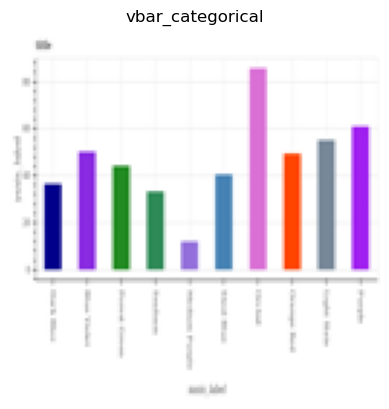

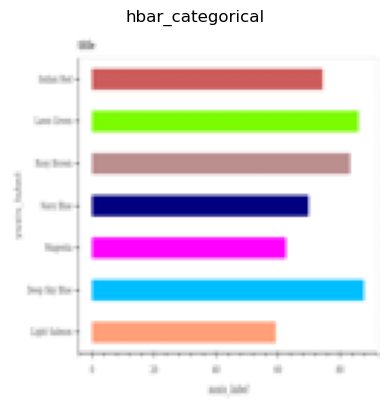

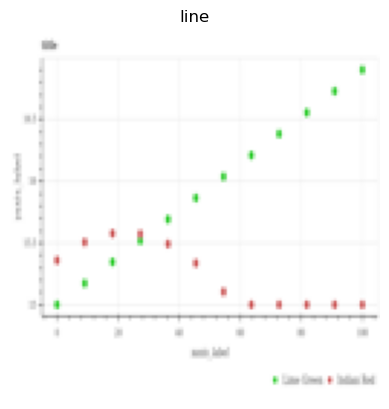

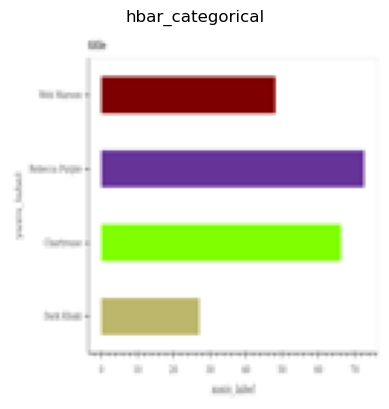

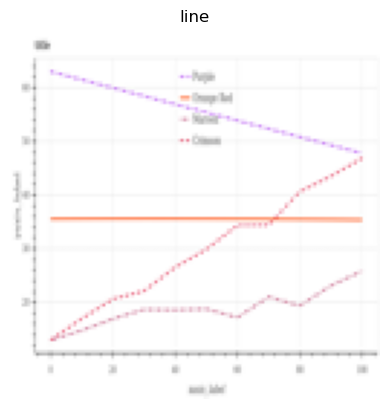

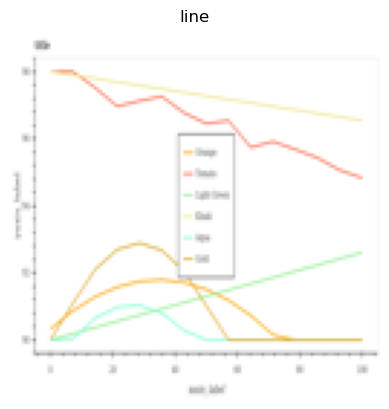

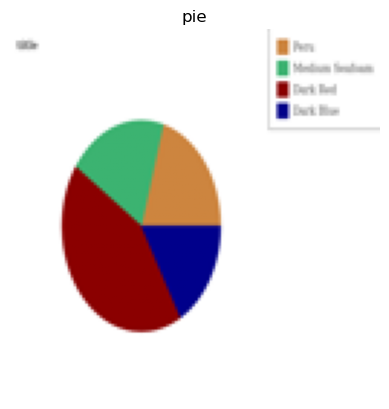

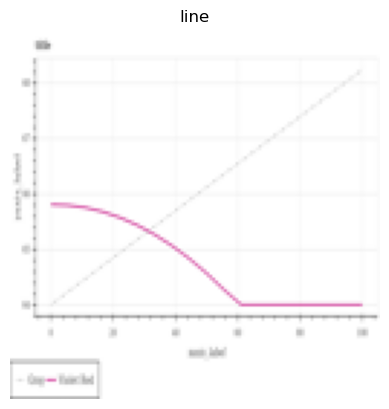

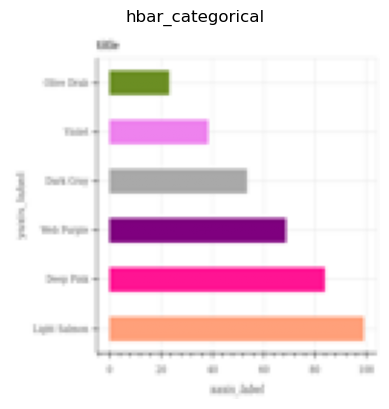

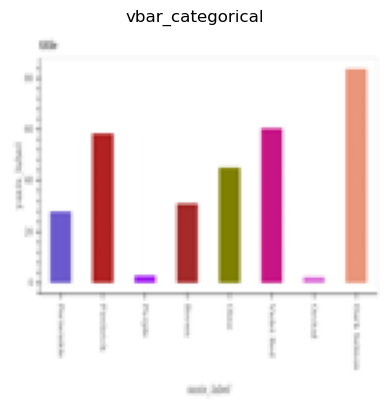

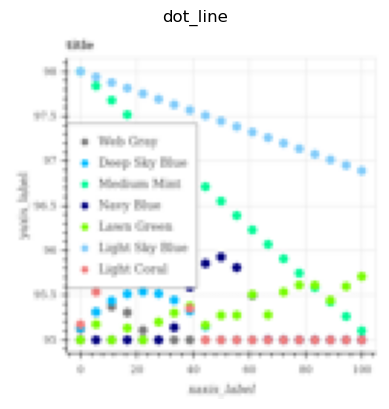

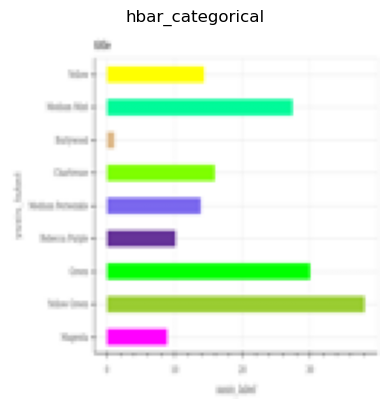

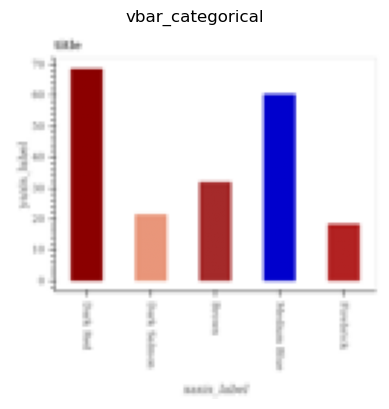

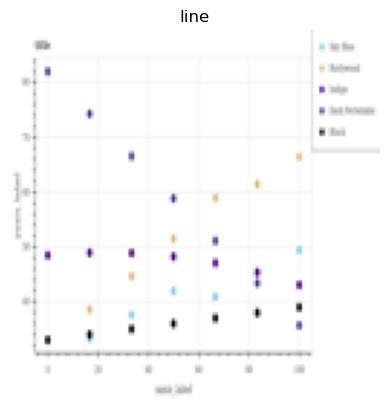

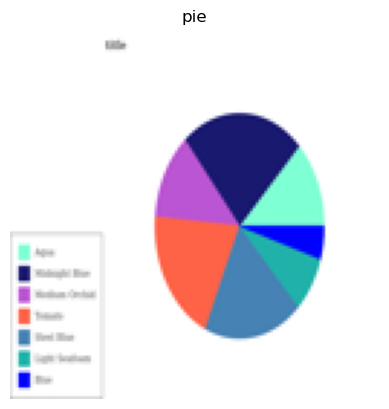

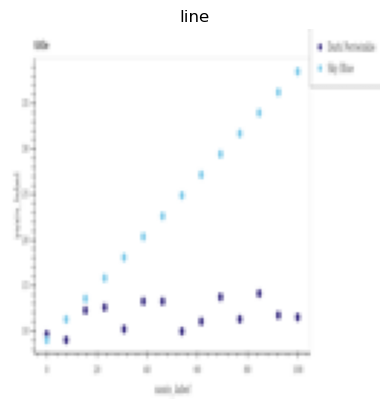

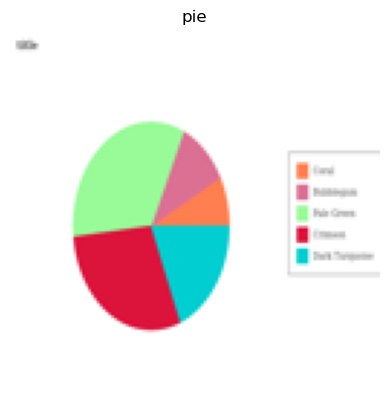

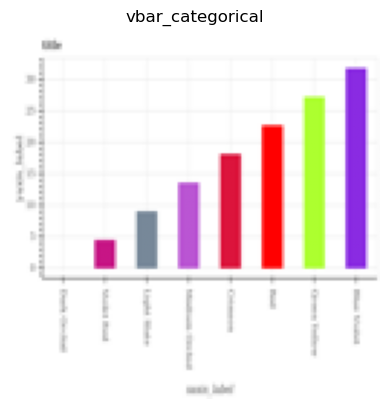

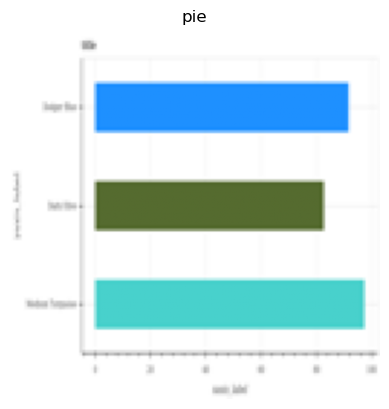

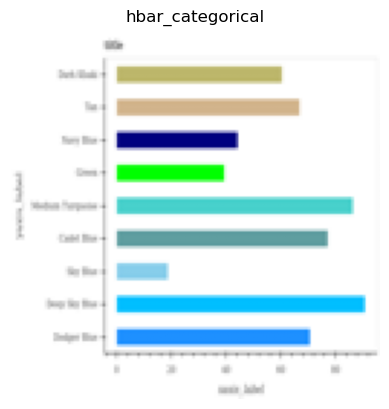

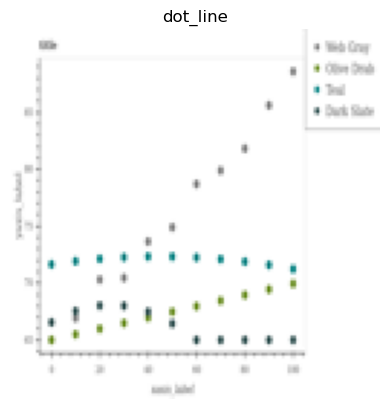

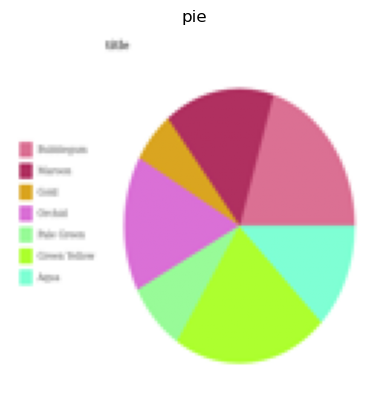

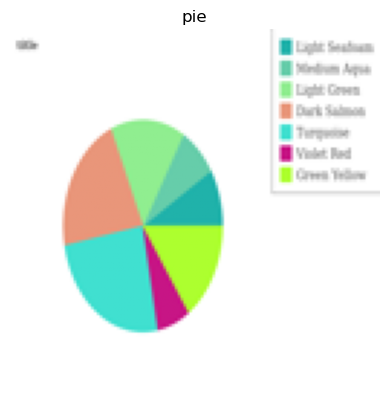

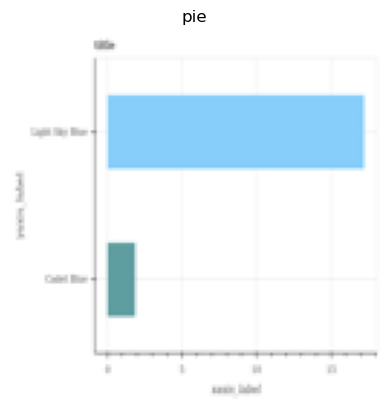

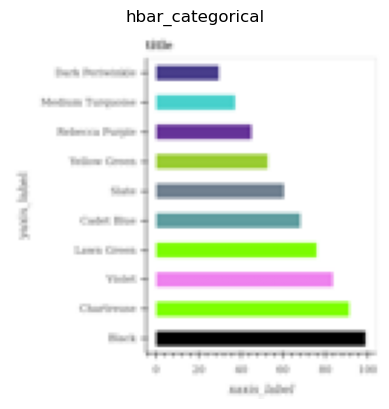

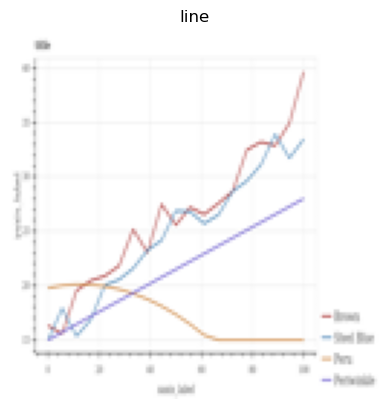

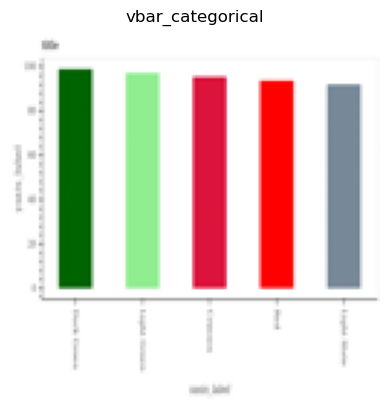

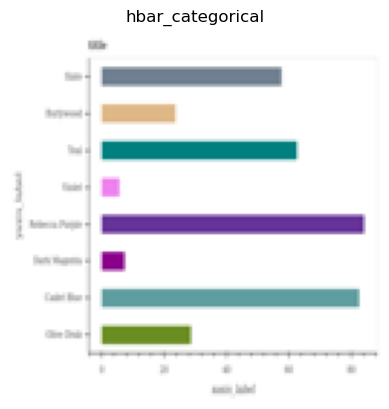

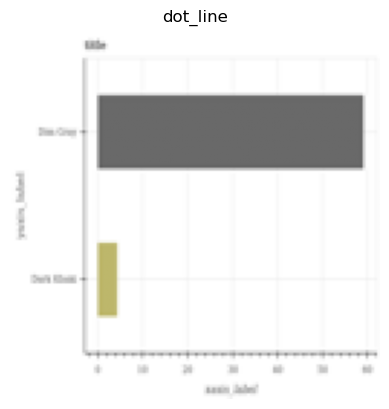

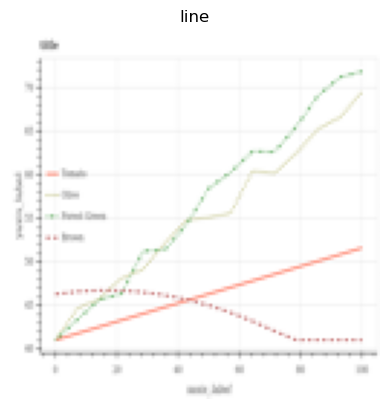

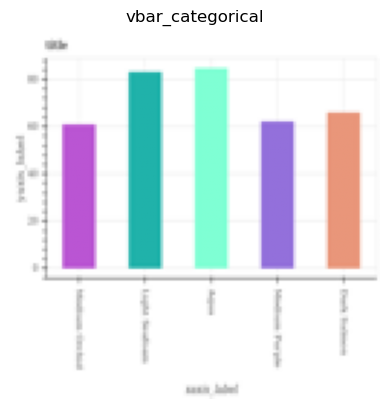

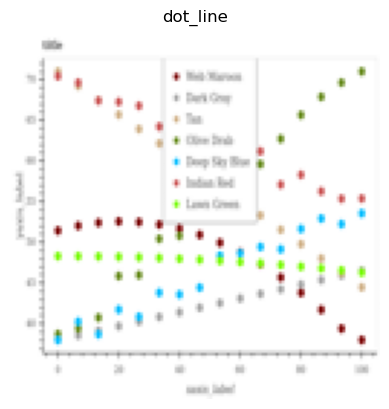

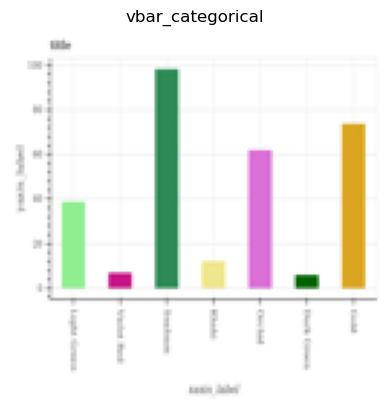

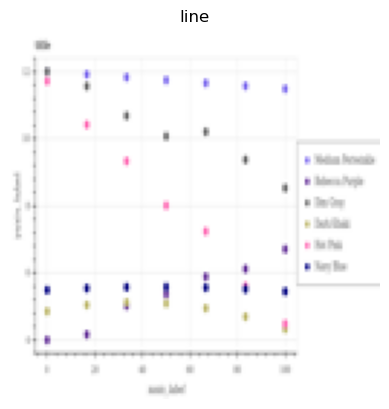

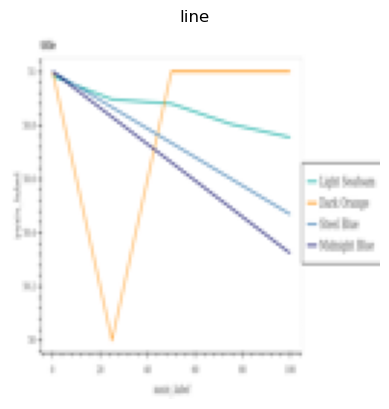

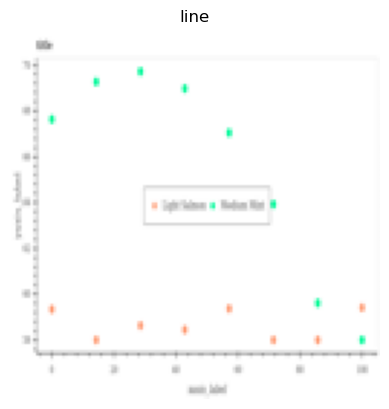

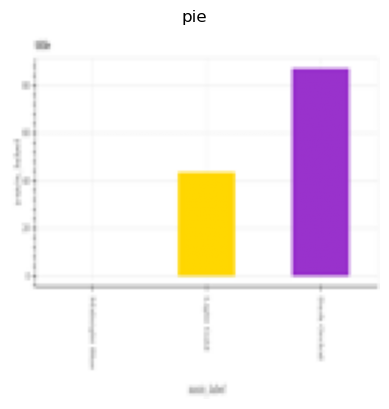

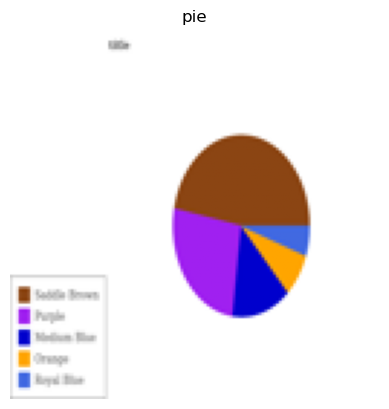

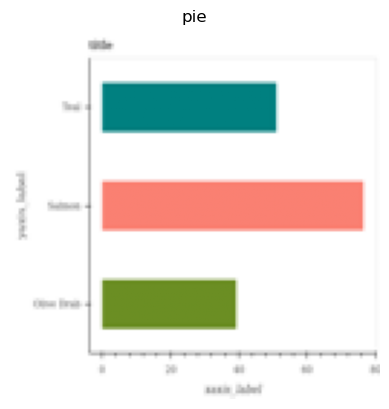

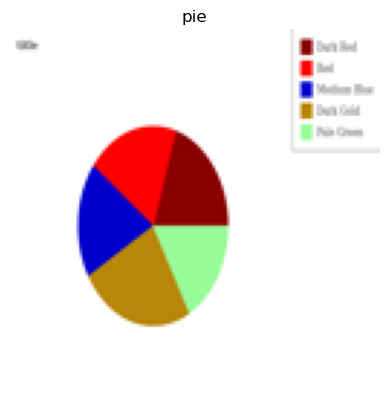

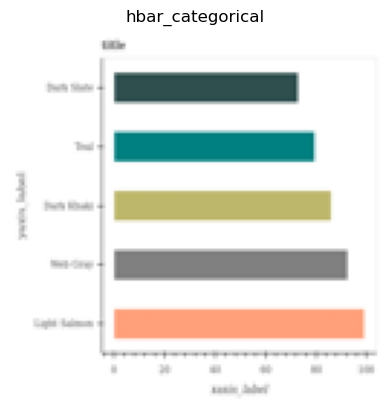

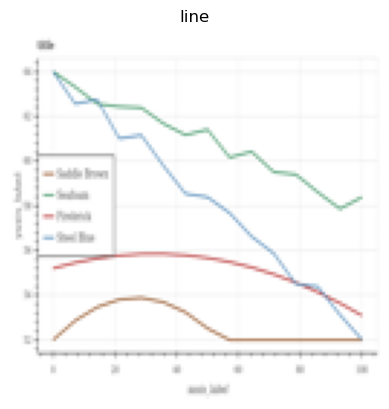

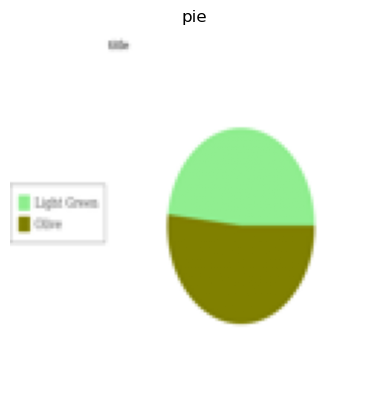

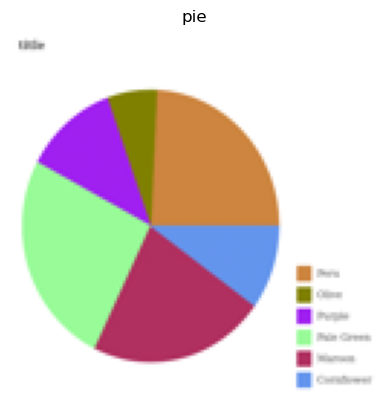

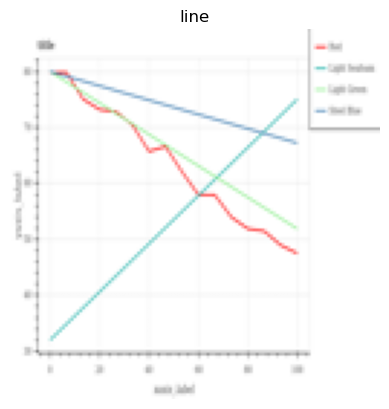

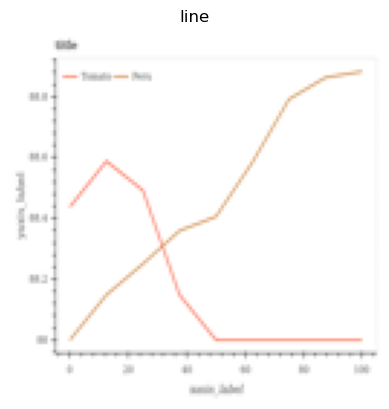

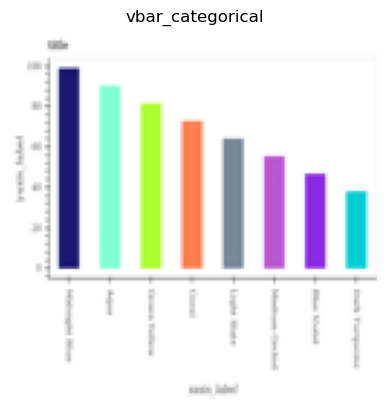

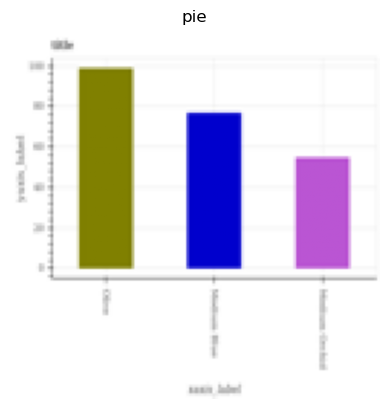

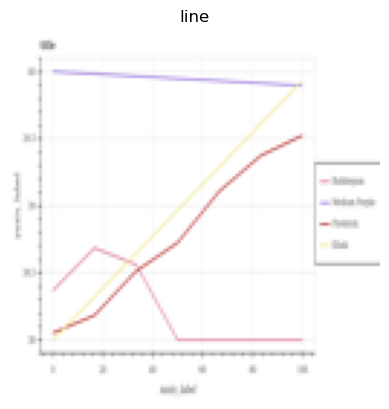

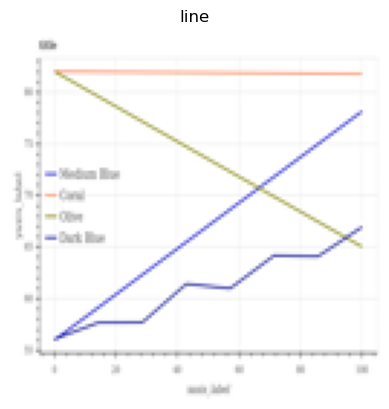

In [15]:
# A dictionary mapping the label index to the label name
label_map = {0: 'line', 1: 'dot_line', 2: 'vbar_categorical', 3: 'hbar_categorical', 4: 'pie'}

# Defining a function to display the image and its predicted label
def display_image(image, label):
    plt.imshow(image)
    plt.title(label_map[label])
    plt.axis('off')
    plt.show()

# Looping through the new images and their predicted labels, and display them
for i in range(len(new_images)):
    display_image(new_images[i], predicted_labels[i])


In [16]:
# Loading the pre-trained model without the final classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freezing the layers in the base model to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False
    
# Adding our own classification layers on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation='softmax'))

# Compiled model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
25/25 [==============================] - 264s 11s/step - loss: 0.6804 - accuracy: 0.9925 - val_loss: 0.5644 - val_accuracy: 0.9850
Epoch 2/2
25/25 [==============================] - 268s 11s/step - loss: 0.4944 - accuracy: 0.9912 - val_loss: 0.4236 - val_accuracy: 0.9950


# Evaluating the fine-tuned model

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

7/7 [==============================] - 109s 17s/step - loss: 0.4236 - accuracy: 0.9950
Accuracy: 99.50


In [21]:
# Make predictions using the trained model on the test set
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_true, y_pred_classes)

7/7 [==============================] - 36s 5s/step


In [22]:
# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Calculate precision score
precision = precision_score(y_true, y_pred_classes, average='weighted')

# Calculate recall score
recall = recall_score(y_true, y_pred_classes, average='weighted')

# Calculate SME (Symmetric Mean Absolute Error)
sme = np.sum(np.abs(y_true - y_pred_classes)) / (2 * len(y_true))

In [23]:
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[36  1  0  0  0]
 [ 0 44  0  0  0]
 [ 0  0 33  0  0]
 [ 0  0  0 48  0]
 [ 0  0  0  0 38]]


In [24]:
print("F1 score:", f1)

F1 score: 0.994993843312298


In [25]:
print("Precision score:", precision)

Precision score: 0.9951111111111111


In [26]:
print("Recall score:", recall)

Recall score: 0.995


In [27]:
print("SME:", sme)

SME: 0.0025


1/1 [==============================] - 1s 779ms/step
Predicted label: hbar_categorical


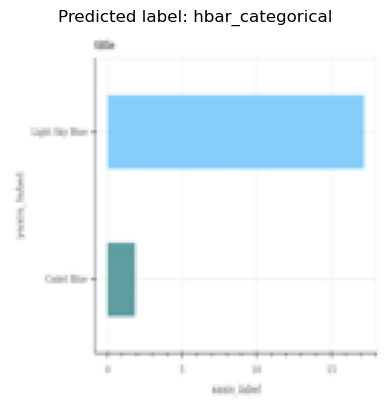

In [20]:
# Define the path to the image file
image_file = './data/test/3.png'

# Load the image and preprocess it for input to the model
img = Image.open(image_file).convert('RGB').resize((128, 128))
img = np.array(img)
img = img/255
img = np.expand_dims(img, axis=0)

# Make a prediction on the image using the trained model
predicted_probabilities = model.predict(img)
predicted_label = np.argmax(predicted_probabilities)

# Print the predicted class label
print('Predicted label:', label_map[predicted_label])

# Visualize the image with the predicted label
plt.imshow(img[0])
plt.title('Predicted label: ' + label_map[predicted_label])
plt.axis('off')
plt.show()

# 

# 